# Matplotlib animation을 이용한 분수 애니메이션

In [1]:
%matplotlib notebook
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np

In [3]:
# Physical Parameters
gravity_acceleration = 9.81
step_time = 0.1
canvas = [0, 100, 0, 100]
max_drops = 1000

In [29]:
class WaterDrop:
    def __init__(self, pos, vel=None, size=1):
        self.size = size
        if isinstance(pos, list):
            self.pos = np.array(pos)
        else:
            self.pos = pos
        if vel is None:
            self.vel = np.zeros((2, 1))
        else:
            self.vel = vel
    
    def init(self):
        theta = np.random.randn(1) * 10 * np.pi/180
        speed = np.random.randn(1) * 10
        pos = np.array(canvas[1::2])/2
        vel = speed * np.array([np.sin(theta), np.cos(theta)])
        
        self.pos = pos.reshape(2,1)
        self.vel = vel.reshape(2,1)
    def update(self):
        if np.random.rand(1) < 0.01:
            self.init()
                
        self.pos += step_time * self.vel
        self.vel[1] -= gravity_acceleration * step_time
        
        self.bounce()
        
        
    def bounce(self):
        if canvas[0] + self.size > self.pos[0]:
            self.vel[0] *= -1
            self.pos[0] += canvas[0] + self.size - self.pos[0]
            return
        if canvas[1] - self.size < self.pos[0]:
            self.vel[0] *= -1
            self.pos[0] -= (canvas[1] - self.size - self.pos[0])
            return
        if canvas[2] + self.size > self.pos[1]:
            self.vel[1] *= -1
            self.pos[1] += canvas[2] + self.size - self.pos[1]
            return
        if canvas[3] - self.size < self.pos[1]:
            self.vel[1] *= -1
            self.pos[1] -= (canvas[3] - self.size - self.pos[1])
            return
            

<IPython.core.display.Javascript object>


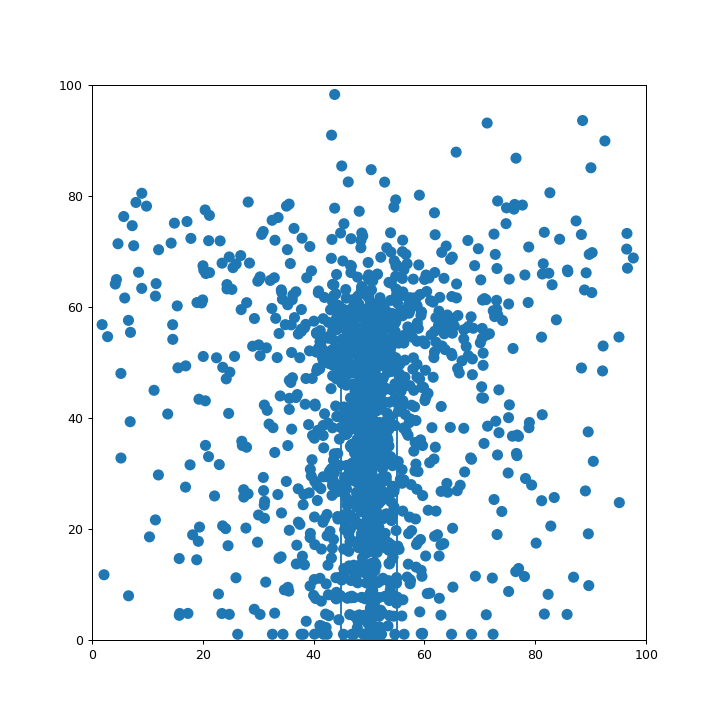

In [34]:
fountain = np.array([[45, 45, 55, 55, 45], [0, 50, 50, 0, 0]])

drops = []

for _ in range(max_drops):
    
    theta = np.random.randn(1) * 10 * np.pi/180
    speed = 1 * np.random.randn(1) + 10
    pos = np.array(canvas[1::2])/2
    vel = speed * np.array([np.sin(theta), np.cos(theta)])
    
    pos = pos.reshape(2,1)
    vel = vel.reshape(2,1)
    drops.append(WaterDrop(pos.reshape(2,1), vel.reshape(2,1), size=1))

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(canvas[:2])
ax.set_ylim(canvas[2:])
ax.set_aspect('equal', adjustable='box')
plt.plot(fountain[0,:], fountain[1,:])

for d in drops:
    d.update()
    circle = plt.Circle(d.pos, d.size)
    ax.add_artist(circle)

def animate(frame):
    ax.cla()
    ax.set_xlim(canvas[:2])
    ax.set_ylim(canvas[2:])
    plt.plot(fountain[0,:], fountain[1,:])
    ax.set_aspect('equal', adjustable='box')
    
    drops.append(WaterDrop(pos, vel, size=1))
    for d in drops:
        d.update()
        circle = plt.Circle(d.pos, d.size)
        ax.add_artist(circle)
        

anim = FuncAnimation(fig, animate, frames=600, interval=10)
plt.show()
        
    

In [27]:
for d in log[0]:
    print(d.pos)
    print(d.vel)
    d.update()

[[49.97492443]
 [49.55076563]]
[[-0.08358522]
 [-3.4594479 ]]
[[49.99267169]
 [49.6318533 ]]
[[-0.02442771]
 [-3.18915568]]
[[49.99302302]
 [49.35495151]]
[[-0.02325659]
 [-4.11216163]]
[[49.8019291 ]
 [48.89737382]]
[[-0.66023634]
 [-5.63742061]]
[[50.10809384]
 [48.91252498]]
[[ 0.3603128 ]
 [-5.58691673]]
[[50.10988031]
 [48.38907866]]
[[ 0.36626769]
 [-7.33173779]]
[[50.99233773]
 [56.08073263]]
[[ 3.30779244]
 [18.30710877]]
[[51.06866329]
 [45.10643901]]
[[  3.56221095]
 [-18.27386996]]
[[50.31321363]
 [48.56049053]]
[[ 1.04404543]
 [-6.7603649 ]]
[[49.31753853]
 [53.73579927]]
[[-2.27487155]
 [10.49066422]]
[[49.89268089]
 [50.32361948]]
[[-0.35773036]
 [-0.8832684 ]]
[[49.99756446]
 [49.79493801]]
[[-0.00811846]
 [-2.64553995]]
[[50.58302535]
 [45.69314098]]
[[  1.94341782]
 [-16.31819675]]
[[49.85672217]
 [49.11609442]]
[[-0.47759276]
 [-4.90835192]]
[[50.12854097]
 [52.04810408]]
[[0.42846989]
 [4.86501361]]
[[50.03109626]
 [49.49269783]]
[[ 0.1036542 ]
 [-3.65300722]]
[[50.0

ValueError: non-broadcastable output operand with shape (2,) doesn't match the broadcast shape (2,2)

In [7]:
drops[0].update()

In [8]:
drops[0].pos, drops[0].vel

(array([50.    , 49.9019]), array([ 0.   , -1.962]))